<a href="https://colab.research.google.com/github/iampundir/Spam-Detection-Mail-project/blob/master/Spam_detection_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report 
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam.csv


In [3]:
!ls

sample_data  spam.csv


**Exploratory Data Analysis**

In [6]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   int64 
 1   Message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [8]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.rename(columns={"v1":"Label","v2":"Message"},inplace=True)

In [16]:
df.columns

Index(['Label', 'Message'], dtype='object')

In [17]:
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

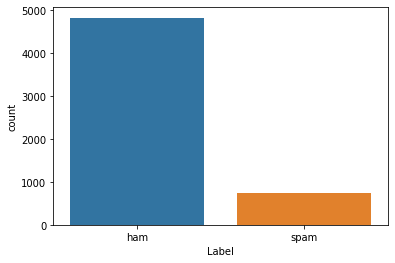

In [23]:
sns.countplot(x=df.Label)

In [25]:
df["Label"]=df.Label.map({"ham":0,"spam":1})

In [26]:
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Modelling**

In [27]:
#defining indipendent and dependent variables.
X=df["Message"]
y=df["Label"]

In [29]:
Count_vec=CountVectorizer()
X=Count_vec.fit_transform(X) #fit and transform the data

In [38]:
#train test split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [39]:
#lets fit our naive bayes classifier
NB=MultinomialNB()
NB.fit(X_train,y_train)
NB.score(X_test,y_test)
y_pred=NB.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1587
           1       0.93      0.92      0.92       252

    accuracy                           0.98      1839
   macro avg       0.96      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1569,   18],
       [  20,  232]])

Lets try some some other models

In [40]:
#whole Code in One go.
"""import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report 
import seaborn as sns

df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.rename(columns={"v1":"Label","v2":"Message"},inplace=True)
df["Label"]=df.Label.map({"ham":0,"spam":1})
#defining indipendent and dependent variables.
X=df["Message"]
y=df["Label"]
Count_vec=CountVectorizer()
X=Count_vec.fit_transform(X) #fit and transform the data
#train test split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,random_state=42)
#lets fit our naive bayes classifier
NB=MultinomialNB()
NB.fit(X_train,y_train)
NB.score(X_test,y_test)
y_pred=NB.predict(X_test)
print(classification_report(y_test,y_pred))"""

After training the model, it is desirable to have a way to persist the model for future use without having to retrain. To achieve this, we add the following lines to save our model as a .pkl file for the later use.

In [43]:
from sklearn.externals import joblib
joblib.dump(NB,"Spam_detection_proj.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Spam_detection_proj.pkl']

And we can load and use saved model later like so:

In [44]:
Spam_detection_proj=open("Spam_detection_proj.pkl","rb")
NB=joblib.load(Spam_detection_proj)

The above process called “persist model in a standard format”, that is, models are persisted in a certain format specific to the language in development.

And the model will be served in a micro-service that expose endpoints to receive requests from client. This is the next step.